### Imports

Required packages including those needed for `image_arrays.py` and `hdf_utils.py`.
- h5py
- numpy
- scipy
- matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.patches import Rectangle

# local imports
from image_arrays import *
from hdf_utils import unpack_hdf
from plot_utils import clean_axes

### Activate interactive plotting
By default, inline plots are static. Here we specify one of two options (comment out the undesired command) that will open plots with GUI controls for us.
- **qt ->** figures opened in windows outside the notebook
- **notebook ->** figures within notebook underneath generating cell.

In [2]:
# %matplotlib qt 
%matplotlib notebook

### Load data

In [16]:
d = {}
for depth in ["DD", "PD"]:
    with h5.File("triggered_waves_%s.h5" % depth) as f:
        d[depth] = unpack_hdf(f)

dd = d["DD"]
pd = d["PD"]
rec_dt = pd["rec_xaxis"][1] - pd["rec_xaxis"][0]
noise_dt = pd["noise_xaxis"][1] - pd["noise_xaxis"][0]
dd_df = (dd["rec"] - np.mean(dd["rec"][-200:])) / np.mean(dd["rec"][-200:])
pd_df = (pd["rec"] - np.mean(pd["rec"][-200:])) / np.mean(pd["rec"][-200:])

print("Data Keys")
print("-------------")
for k in dd.keys():
   print(k) 

Data Keys
-------------
avg_cross_corr
avg_trig_event
avg_trig_lead
cross_xaxis
event_xaxis
glusnfr_template
lead_xaxis
noise_wave
noise_xaxis
offset_cross_xaxis
offset_event_xaxis
offset_lead_xaxis
rec
rec_xaxis
scaled_cross_corr
scaled_trig_event
scaled_trig_lead


## Distal

<IPython.core.display.Javascript object>


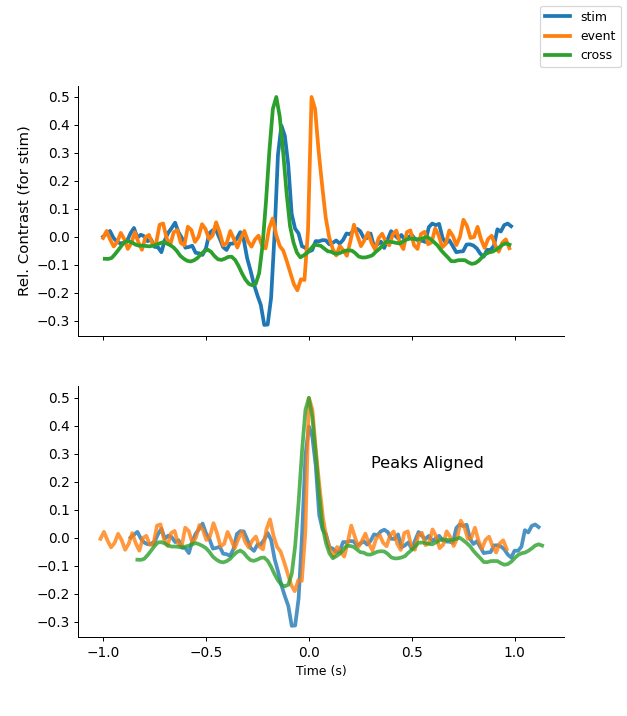

In [5]:
lead_vs_event_dd_fig, lead_vs_event_dd_ax = plt.subplots(
    2, sharex=True, sharey=True, figsize=(7, 8))

lead_vs_event_dd_ax[0].plot(dd["lead_xaxis"], dd["scaled_trig_lead"], linewidth=3, label="stim")
lead_vs_event_dd_ax[1].plot(dd["offset_lead_xaxis"], dd["scaled_trig_lead"], linewidth=3, alpha=0.8)

lead_vs_event_dd_ax[0].plot(dd["event_xaxis"], dd["scaled_trig_event"], linewidth=3, label="event")
lead_vs_event_dd_ax[1].plot(dd["offset_event_xaxis"], dd["scaled_trig_event"], linewidth=3, alpha=0.8)

lead_vs_event_dd_ax[0].plot(dd["cross_xaxis"], dd["scaled_cross_corr"], linewidth=3, label="cross")
lead_vs_event_dd_ax[1].plot(dd["offset_cross_xaxis"], dd["scaled_cross_corr"], linewidth=3, alpha=0.8)

lead_vs_event_dd_ax[1].text(0.3, 0.25, "Peaks Aligned", fontsize=13)
lead_vs_event_dd_ax[0].set_ylabel("Rel. Contrast (for stim)", fontsize=12)
lead_vs_event_dd_ax[-1].set_xlabel("Time (s)")

lead_vs_event_dd_fig.legend()
clean_axes(lead_vs_event_dd_ax)

## Proximal

<IPython.core.display.Javascript object>


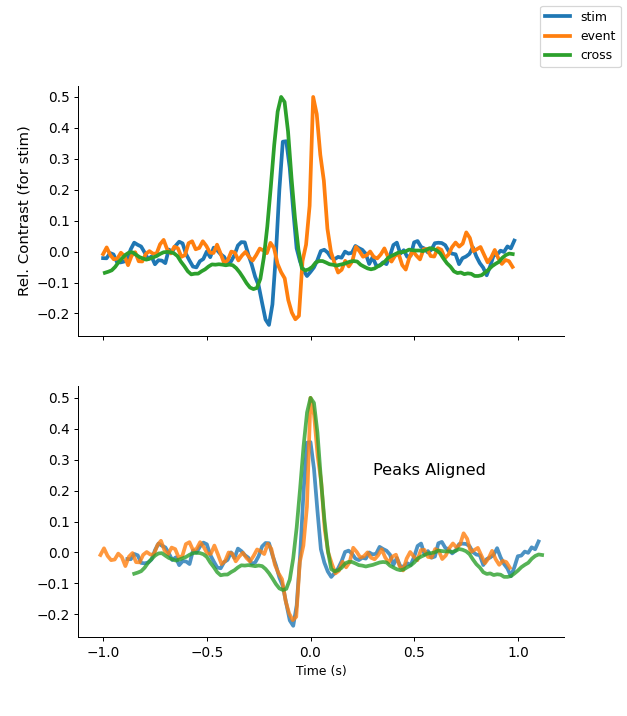

In [6]:
lead_vs_event_pd_fig, lead_vs_event_pd_ax = plt.subplots(
    2, sharex=True, sharey=True, figsize=(7, 8))

lead_vs_event_pd_ax[0].plot(pd["lead_xaxis"], pd["scaled_trig_lead"], linewidth=3, label="stim")
lead_vs_event_pd_ax[1].plot(pd["offset_lead_xaxis"], pd["scaled_trig_lead"], linewidth=3, alpha=0.8)

lead_vs_event_pd_ax[0].plot(pd["event_xaxis"], pd["scaled_trig_event"], linewidth=3, label="event")
lead_vs_event_pd_ax[1].plot(pd["offset_event_xaxis"], pd["scaled_trig_event"], linewidth=3, alpha=0.8)

lead_vs_event_pd_ax[0].plot(pd["cross_xaxis"], pd["scaled_cross_corr"], linewidth=3, label="cross")
lead_vs_event_pd_ax[1].plot(pd["offset_cross_xaxis"], pd["scaled_cross_corr"], linewidth=3, alpha=0.8)

lead_vs_event_pd_ax[1].text(0.3, 0.25, "Peaks Aligned", fontsize=13)
lead_vs_event_pd_ax[0].set_ylabel("Rel. Contrast (for stim)", fontsize=12)
lead_vs_event_pd_ax[-1].set_xlabel("Time (s)")

lead_vs_event_pd_fig.legend()
clean_axes(lead_vs_event_pd_ax)

## Proximal vs Distal

<IPython.core.display.Javascript object>


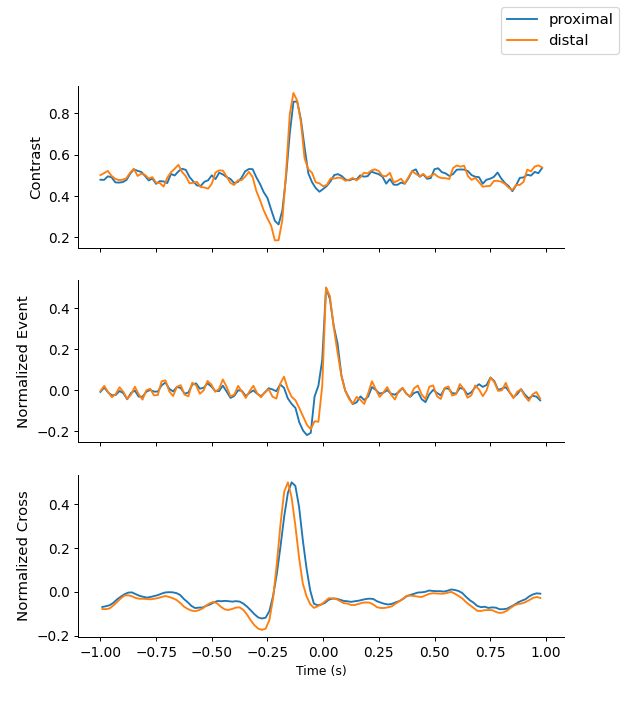

In [7]:
prox_vs_dist_fig, prox_vs_dist_ax = plt.subplots(3, sharex=True, figsize=(7, 8))

prox_vs_dist_ax[0].plot(pd["lead_xaxis"], pd["avg_trig_lead"], label="proximal")
prox_vs_dist_ax[0].plot(dd["lead_xaxis"], dd["avg_trig_lead"], label="distal")
prox_vs_dist_ax[0].set_ylabel("Contrast", fontsize=12)

prox_vs_dist_ax[1].plot(pd["event_xaxis"], pd["scaled_trig_event"])
prox_vs_dist_ax[1].plot(dd["event_xaxis"], dd["scaled_trig_event"])
prox_vs_dist_ax[1].set_ylabel("Normalized Event", fontsize=12)

prox_vs_dist_ax[2].plot(pd["cross_xaxis"], pd["scaled_cross_corr"])
prox_vs_dist_ax[2].plot(dd["cross_xaxis"], dd["scaled_cross_corr"])
prox_vs_dist_ax[2].set_ylabel("Normalized Cross", fontsize=12)

prox_vs_dist_ax[-1].set_xlabel("Time (s)")

prox_vs_dist_fig.legend(fontsize=12)
clean_axes(prox_vs_dist_ax)

<IPython.core.display.Javascript object>


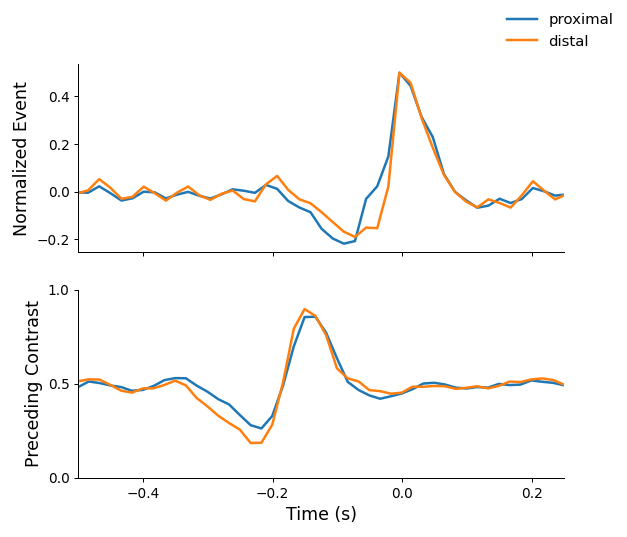

In [8]:
# note: subtracted one rec dt since it seems like my triggered averaging is off one step
# peak is correctly centred on t=0 this way
w = 2.
prox_vs_dist_supp_fig, prox_vs_dist_supp_ax = plt.subplots(2, sharex=True, figsize=(7, 6))

prox_vs_dist_supp_ax[0].plot(
    pd["event_xaxis"] - rec_dt, pd["scaled_trig_event"], linewidth=w)
prox_vs_dist_supp_ax[0].plot(
    dd["event_xaxis"] - rec_dt, dd["scaled_trig_event"], linewidth=w)
prox_vs_dist_supp_ax[0].set_ylabel("Normalized Event", fontsize=14)

prox_vs_dist_supp_ax[1].plot(
    pd["lead_xaxis"] - rec_dt, pd["avg_trig_lead"], label="proximal", linewidth=w)
prox_vs_dist_supp_ax[1].plot(
    dd["lead_xaxis"] - rec_dt, dd["avg_trig_lead"], label="distal", linewidth=w)
prox_vs_dist_supp_ax[1].set_ylim(0, 1)
prox_vs_dist_supp_ax[1].set_yticks([0., 0.5, 1.])
prox_vs_dist_supp_ax[1].set_ylabel("Preceding Contrast", fontsize=14)

prox_vs_dist_supp_ax[-1].set_xlim(-0.5, 0.25)
prox_vs_dist_supp_ax[-1].set_xticks([-0.4, -0.2, 0., 0.2])
prox_vs_dist_supp_ax[-1].set_xlabel("Time (s)", fontsize=14)

prox_vs_dist_supp_fig.legend(fontsize=12, frameon=False)
clean_axes(prox_vs_dist_supp_ax, ticksize=12)
prox_vs_dist_supp_fig.savefig("triggered_event_stim.svg", bbox_inches="tight")

<IPython.core.display.Javascript object>


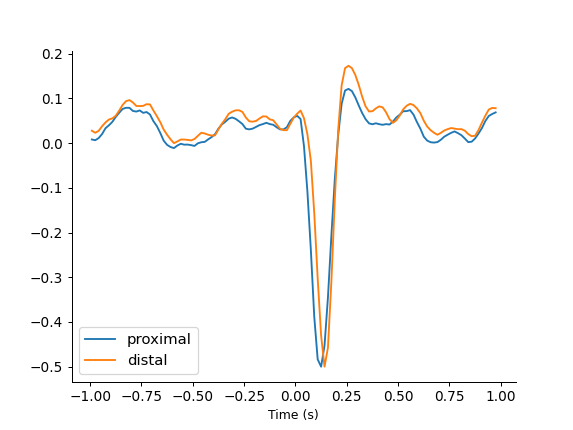

In [9]:
fransen_fig, fransen_ax = plt.subplots(1)
fransen_ax.plot(pd["cross_xaxis"], np.flip(pd["scaled_cross_corr"]) * -1, label="proximal")
fransen_ax.plot(dd["cross_xaxis"], np.flip(dd["scaled_cross_corr"]) * -1, label="distal")
fransen_ax.set_xlabel("Time (s)")
fransen_ax.legend(fontsize=12)
clean_axes(fransen_ax)

In [32]:
nearest_index(dd["rec_xaxis"], 20)

1165

mse =  0.12422380534642415


<IPython.core.display.Javascript object>


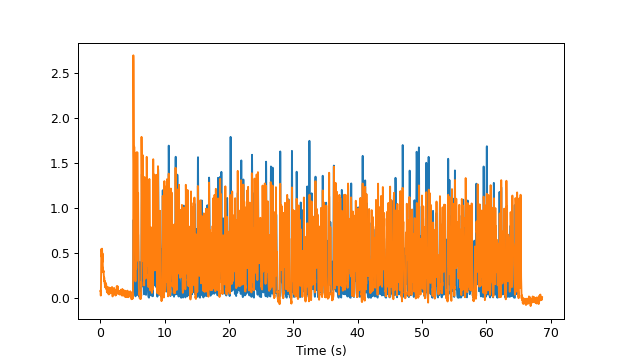

Text(0.5, 0, 'Time (s)')

In [41]:
max_w0 = nearest_index(dd["rec_xaxis"], 6)
max_w1 = nearest_index(dd["rec_xaxis"], 60)

conv = np.convolve(dd["noise_wave"] - 0.5, np.flip(dd["avg_trig_lead"] - 0.5), mode="same")
conv = np.clip(conv, 0., np.max(conv))
conv_event = np.convolve(conv, np.flip(dd["glusnfr_template"]), mode="same")
# conv_event = np.clip(conv_event, 0., np.max(conv_event))
conv_xaxis = np.arange(len(conv)) * noise_dt + dd["noise_xaxis"][0]
scaled_conv_event = (conv_event 
                     * np.max(dd_df[max_w0:max_w1]) 
                     / np.max(conv_event[max_w0:max_w1]))

stim_start_idx = nearest_index(dd["rec_xaxis"], dd["noise_xaxis"][0] - 0.05)
trig_end_idx = nearest_index(dd["rec_xaxis"], conv_xaxis[-1])
crop_rec = dd_df[stim_start_idx:trig_end_idx - 2]
crop_rec_xaxis = np.arange(len(crop_rec)) * rec_dt + dd["noise_xaxis"][0]
upsample_crop_rec = signal.resample(crop_rec, len(conv_event))
print("mse = ", np.mean(np.square(scaled_conv_event - upsample_crop_rec)))

trig_conv_fig, trig_conv_ax = plt.subplots(1, figsize=(7, 4))
trig_conv_ax.plot(conv_xaxis - 0.05, scaled_conv_event)
# trig_conv_ax.plot(conv_xaxis - 0.05, conv * np.max(dd_df / np.max(conv)))
trig_conv_ax.plot(dd["rec_xaxis"], dd_df)
# trig_conv_ax.plot(conv_xaxis, scaled_conv_event)
# trig_conv_ax.plot(crop_rec_xaxis, crop_rec)

trig_conv_ax.set_xlabel("Time (s)")

<IPython.core.display.Javascript object>


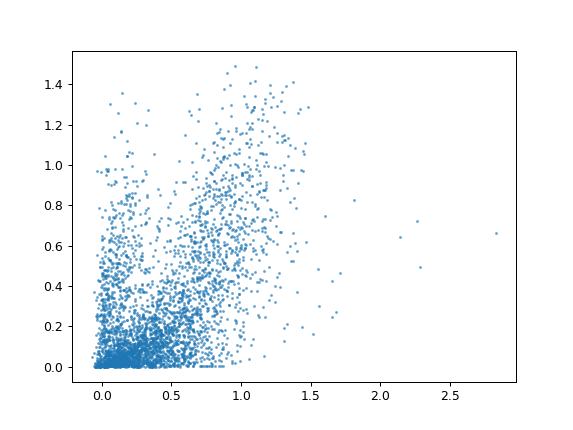

In [35]:
ff, aa = plt.subplots(1)
aa.scatter(upsample_crop_rec, scaled_conv_event, s=2.,alpha=0.5)

mse =  0.0968613379300938


<IPython.core.display.Javascript object>


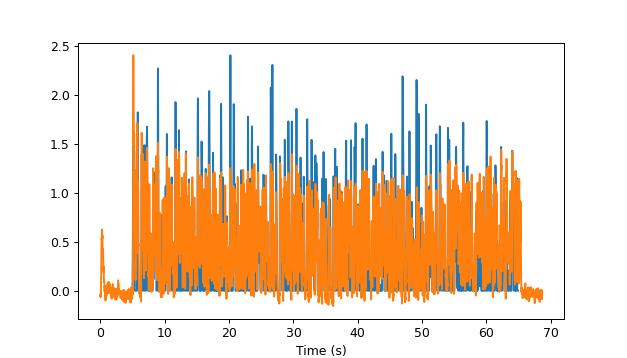

Text(0.5, 0, 'Time (s)')

In [36]:
cross_conv = np.convolve(pd["noise_wave"] - 0.5, np.flip(pd["scaled_cross_corr"]), mode="same")
cross_conv = np.clip(cross_conv, 0., np.max(cross_conv))
cross_conv_event = np.convolve(cross_conv, np.flip(pd["glusnfr_template"]), mode="same")
# cross_conv_event = np.clip(cross_conv_event, 0., np.max(cross_conv_event))
cross_conv_xaxis = np.arange(
    len(cross_conv)) * noise_dt + pd["noise_xaxis"][0]
scaled_cross_conv_event = (cross_conv_event 
                           * np.max(pd_df[max_w0:max_w1]) 
                           / np.max(cross_conv_event[max_w0:max_w1]))

stim_start_idx = nearest_index(pd["rec_xaxis"], pd["noise_xaxis"][0] - 0.05)
conv_end_idx = nearest_index(pd["rec_xaxis"], cross_conv_xaxis[-1])
crop_rec = pd_df[stim_start_idx:conv_end_idx - 2]
crop_rec_xaxis = np.arange(len(crop_rec)) * rec_dt + pd["noise_xaxis"][0]
upsample_crop_rec = signal.resample(crop_rec, len(cross_conv_event))
print("mse = ", np.mean(np.square(scaled_cross_conv_event - upsample_crop_rec)))

cross_conv_fig, cross_conv_ax = plt.subplots(1, figsize=(7, 4))
# cross_conv_ax.plot(cross_conv_xaxis - 0.05, scaled_cross_conv_event)
cross_conv_ax.plot(cross_conv_xaxis - 0.05, cross_conv * np.max(pd_df / np.max(cross_conv)))
cross_conv_ax.plot(pd["rec_xaxis"], pd_df)
# cross_conv_ax.plot(cross_conv_xaxis, scaled_cross_conv_event)
# cross_conv_ax.plot(crop_rec_xaxis, crop_rec)

cross_conv_ax.set_xlabel("Time (s)")

<IPython.core.display.Javascript object>


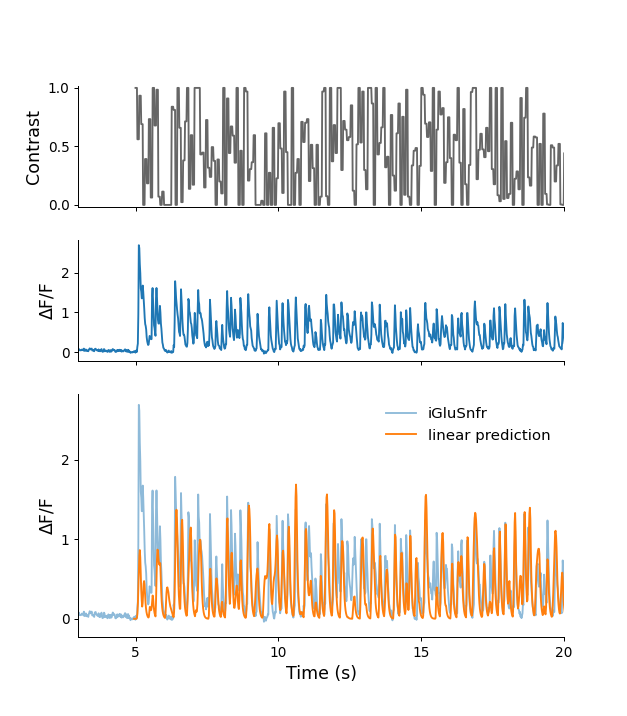

In [63]:
w = 1.5
noise_resp_fig, noise_resp_ax = plt.subplots(
    3, sharex=True, figsize=(7, 8),
    gridspec_kw={"height_ratios": [0.2, 0.2, 0.4]},
)

noise_resp_ax[0].plot(dd["noise_xaxis"], dd["noise_wave"], linewidth=w, c="0.4")
noise_resp_ax[0].set_ylim(-0.02, 1.02)
noise_resp_ax[0].set_yticks([0., 0.5, 1.])
noise_resp_ax[0].set_ylabel("Contrast", fontsize=14)

noise_resp_ax[1].plot(dd["rec_xaxis"], dd_df, linewidth=w)
noise_resp_ax[1].set_yticks([0., 1., 2.])
noise_resp_ax[1].set_ylabel("ΔF/F", fontsize=14)

noise_resp_ax[2].plot(dd["rec_xaxis"], dd_df, label="iGluSnfr", linewidth=w, alpha=0.5)
noise_resp_ax[2].plot(conv_xaxis - 0.05, scaled_conv_event, label="linear prediction")
noise_resp_ax[2].set_yticks([0., 1., 2.])
noise_resp_ax[2].set_ylabel("ΔF/F", fontsize=14)
noise_resp_ax[2].legend(fontsize=12, frameon=False)

noise_resp_ax[-1].set_xlim(3, 20)
noise_resp_ax[-1].set_xticks([5., 10., 15., 20.])
noise_resp_ax[-1].set_xlabel("Time (s)", fontsize=14)

clean_axes(noise_resp_ax)
noise_resp_fig.savefig("noise_resp_prediction.svg", bbox_inches="tight")